In [13]:
import json
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import pickle
import scipy.sparse as ss
sys.path.append('/data/kenlay/DyNNet/')
from src.utils.graphs import degree_matrix

### Results of the synthetic experiment with DSBM and multiple change-points of type clique

In [14]:
res_dir = '/data/kenlay/DyNNet/results/synthetic/'
list_res = ["multiple_cps_03_29_20:57:37_cliques_k_4_S_30_L_6_features_identity",
            #"multiple_cps_03_27_08:48:44_cliques_k_4_S_40_L_6_features_identity",
            "multiple_cps_04_06_10:35:43_cliques_k_4_S_40_L_6_features_identity",
            "multiple_cps_04_07_17:07:07_cliques_k_4_S_50_L_6_features_identity",
            #"multiple_cps_03_24_06:07:26_cliques_k_4_S_50_L_6_features_identity",
            #"multiple_cps_03_25_10:30:34_cliques_k_4_S_60_L_6_features_identity",
            "multiple_cps_03_27_08:52:18_cliques_k_4_S_60_L_6_features_identity",
            "multiple_cps_03_29_20:39:22_cliques_k_4_S_70_L_6_features_identity",
            "multiple_cps_04_06_10:35:28_cliques_k_4_S_80_L_6_features_identity"
]
#list_res = ["multiple_cps_03_20_23:14:01_cliques_k_4_S_30_L_6_features_identity"]
# list_res = ["multiple_cps_03_16_17:05:36_cliques_k_4_S_30_L_6_features_identity",
# "multiple_cps_03_16_17:55:32_cliques_k_4_S_50_L_6_features_identity",
# "multiple_cps_03_16_19:04:01_cliques_k_4_S_60_L_6_features_identity",
# "multiple_cps_03_16_20:25:22_cliques_k_4_S_70_L_6_features_identity",
# "multiple_cps_03_16_21:39:28_cliques_k_4_S_80_L_6_features_identity"]
configs, cp_times, f1_scores, ari, thresholds = [], [], [], [], []
for i,a in enumerate(list_res):
    with open(res_dir + a + '/exp_config.json') as f:
            configs.append(json.load(f))
    for h in zip([cp_times, f1_scores, ari, thresholds], ['/compute_times.p', '/test_f1scores.p', '/test_ari.p', '/thresholds.p']):
        with open(res_dir + a + h[1], 'rb') as f:
            h[0].append(pickle.load(f))
configs

[{'n_workers': 1,
  'n_nodes': 400,
  'n_change_points': 4,
  'sizes_clique': [40, 30],
  'p': 0.08,
  'q': 0.02,
  'n_samples_train': 3000,
  'n_samples_test': 100,
  'data_features': None,
  'sequence': True,
  'save_dir': '/data/kenlay/DyNNet/results/synthetic/',
  'rep': 10,
  'validation_proportion': 0.5,
  'n_pairs': 9000,
  'batch_size': 64,
  'embedding_module': 'gcn',
  'nlayers': 3,
  'nlayers_mlp': 2,
  'hidden': 64,
  'distance': 'euclidean',
  'pooling': 'topk',
  'loss': 'bce',
  'weight_loss': 1.0,
  'margin_loss': 1.0,
  'top_k': [30, 50, 100],
  'nepochs': 100,
  'features': 'identity',
  'input_dim': None,
  'dropout': 0.05,
  'weight_decay': 0.0001,
  'lr': 0.01,
  'patience': 30,
  'cuda': 0,
  'profiler': False,
  'window_lengths': [6],
  'threshold': 0.5,
  'tolerance': 3,
  'n_eigen': 4,
  'normalize': False,
  'baselines': True,
  'save_dir_task': '/data/kenlay/DyNNet/results/synthetic/multiple_cps_03_29_20:57:37_cliques_k_4_S_30_L_6_features_identity',
  'S': 3

In [84]:
res_dir = '/data/kenlay/DyNNet/results/synthetic/'

list_res = ["multiple_cps_04_13_07:11:10_cliques_k_4_S_20_L_6_features_identity",
            "multiple_cps_04_15_04:42:49_cliques_k_4_S_30_L_6_features_identity",
            "multiple_cps_04_13_07:11:51_cliques_k_4_S_40_L_6_features_identity",
            "multiple_cps_04_15_22:53:44_cliques_k_4_S_50_L_6_features_identity",
            "multiple_cps_04_18_10:55:44_cliques_k_4_S_60_L_6_features_identity",
            "multiple_cps_04_15_20:26:12_cliques_k_4_S_70_L_6_features_identity",
            "multiple_cps_04_13_07:11:38_cliques_k_4_S_80_L_6_features_identity"]


# list_res = ["multiple_cps_03_29_20:57:37_cliques_k_4_S_30_L_6_features_identity",
#             "multiple_cps_03_27_08:48:44_cliques_k_4_S_40_L_6_features_identity",
#             "multiple_cps_03_23_07:06:06_cliques_k_4_S_50_L_6_features_identity",
#             #"multiple_cps_03_24_06:07:26_cliques_k_4_S_50_L_6_features_identity",
#             #"multiple_cps_03_25_10:30:34_cliques_k_4_S_60_L_6_features_identity",
#             "multiple_cps_03_27_08:52:18_cliques_k_4_S_60_L_6_features_identity",
#             "multiple_cps_03_29_20:39:22_cliques_k_4_S_70_L_6_features_identity"
# ]
#list_res = ["multiple_cps_03_20_23:14:01_cliques_k_4_S_30_L_6_features_identity", "multiple_cps_03_21_11:06:54_cliques_k_4_S_40_L_6_features_identity",
            #"multiple_cps_03_21_13:32:42_cliques_k_4_S_50_L_6_features_identity"]
list_ari, list_f1_scores, list_c_times, list_configs = [], [], [], []
for a in list_res:
    with open(res_dir + a + f'/exp_config.json', 'r') as f:
        r = json.load(f)
    list_configs.append(r)
    ari, f1_scores, c_times = {}, {}, {}
    for m in ['sgnn', 'sgnn_m2', 'train_sgnn', 'test_sgnn', 'ncpd', 'cusum', 'cusum_2', 'frobenius', 'wl', 'lad']:
        ari[m], f1_scores[m], c_times[m] = [], [], []
    nrep = len(glob.glob(res_dir+a+'/*/'))
    for i in range(nrep):
        with open(res_dir + a + f'/rep_{i}/results.p', 'rb') as f:
            r = pickle.load(f)
        print(r['f1_sgnn'])
        ari['sgnn'].append(r['ari_sgnn'])
        ari['sgnn_m2'].append(r['ari_sgnn_m2'])
        f1_scores['sgnn'].append(r['f1_sgnn'])
        f1_scores['sgnn_m2'].append(r['f1_sgnn_m2'])
        c_times['train_sgnn'].append(np.mean(r['time_train_sgnn']))
        c_times['test_sgnn'].append(np.mean(r['time_test_sgnn']))
        for m in  ['ncpd', 'cusum', 'cusum_2', 'frobenius', 'wl', 'lad']:
            ari[m].append(r[m][0])
            f1_scores[m].append(r[m][1])
            c_times[m].append(r[m][-1])
    for m in ['sgnn', 'sgnn_m2', 'train_sgnn', 'test_sgnn', 'ncpd', 'cusum', 'cusum_2', 'frobenius', 'wl', 'lad']:
        ari[m], f1_scores[m], c_times[m] = np.array(ari[m]), np.array(f1_scores[m]), np.array(c_times[m])
    list_ari.append(ari)
    list_f1_scores.append(f1_scores)
    list_c_times.append(c_times)


[0.8813559322033897, 0.0, 0.23636363636363633]
[0.6709677419354838, 0.0, 0.0]
[0.6753246753246753, 0.0, 0.2260869565217391]
[0.0, 0.2300884955752212, 0.6666666666666666]
[0.7074829931972789, 0.0, 0.0]
[0.2385321100917431, 0.0, 0.0]
[0.582089552238806, 0.7027027027027027, 0.23636363636363633]
[0.7074829931972789, 0.8024691358024693, 0.7074829931972789]
[0.5416666666666666, 0.8571428571428571, 0.0]
[0.6887417218543047, 0.7222222222222222, 0.23636363636363633]
[0.7272727272727273, 0.6979865771812079, 0.7222222222222222]
[0.41269841269841273, 0.7272727272727273, 0.9891304347826088]
[0.994535519125683, 0.9176470588235295, 0.9891304347826088]
[0.4444444444444445, 0.8666666666666666, 0.9891304347826088]
[0.994535519125683, 0.923076923076923, 0.7831325301204819]
[0.923076923076923, 0.6, 0.923076923076923]
[0.7975460122699387, 1.0, 0.7172413793103448]
[0.9578947368421054, 0.994535519125683, 0.9680851063829787]
[0.994535519125683, 0.6666666666666666, 0.978494623655914]
[0.5492957746478873, 0.783

In [85]:
list_configs

[{'n_workers': 1,
  'n_nodes': 400,
  'n_change_points': 4,
  'sizes_clique': [20, 30],
  'p': 0.08,
  'q': 0.02,
  'n_samples_train': 3000,
  'n_samples_test': 100,
  'data_features': None,
  'sequence': True,
  'save_dir': '/data/kenlay/DyNNet/results/synthetic/',
  'rep': 10,
  'validation_proportion': 0.5,
  'n_pairs': 9000,
  'batch_size': 64,
  'embedding_module': 'gcn',
  'nlayers': 3,
  'nlayers_mlp': 2,
  'hidden': 64,
  'distance': 'euclidean',
  'pooling': 'topk',
  'loss': 'bce',
  'weight_loss': 1.0,
  'margin_loss': 1.0,
  'top_k': [30, 50, 100],
  'nepochs': 100,
  'features': 'identity',
  'input_dim': None,
  'dropout': 0.05,
  'weight_decay': 0.0001,
  'lr': 0.01,
  'patience': 30,
  'cuda': 2,
  'profiler': False,
  'window_lengths': [6],
  'threshold': 0.5,
  'tolerance': 3,
  'n_eigen': 4,
  'normalize': False,
  'baselines': True,
  'save_dir_task': '/data/kenlay/DyNNet/results/synthetic/multiple_cps_04_13_07:11:10_cliques_k_4_S_20_L_6_features_identity',
  'S': 2

In [86]:
list_c_times

[{'sgnn': array([], dtype=float64),
  'sgnn_m2': array([], dtype=float64),
  'train_sgnn': array([4364.39174318, 3589.72400546, 3281.5821956 , 4011.2287794 ,
         3925.31621679, 4646.58825231, 3947.97291756, 4171.75505169,
         3687.91962584, 3627.70483637]),
  'test_sgnn': array([19.68737713, 14.51227991, 15.97042529, 20.35643029, 15.18846337,
         15.14082837, 18.74066623, 20.97104454, 17.02384837, 15.80370156]),
  'ncpd': array([555.96500564, 555.23936009, 440.72933865, 563.02598953,
         545.05733228, 401.37985611, 536.06238842, 574.87487745,
         560.78192091, 417.16705322]),
  'cusum': array([120.08233023, 111.98608279, 122.38993621, 114.99575162,
         113.77385497, 125.47868156, 137.0690136 , 107.28582811,
         115.41102457, 151.51347828]),
  'cusum_2': array([1477.36527395, 1479.03862524, 1537.63617444, 1492.55950284,
         1451.65944362, 1492.25731587,  502.54459882, 1188.80749297,
         1556.20772719,  944.14727259]),
  'frobenius': array([23

In [87]:
for i in range(len(list_f1_scores)):
    print('f1 :' , list_f1_scores[i]['cusum'])
    print('ari :' , list_ari[i]['cusum'])

f1 : [0.58947368 0.52427184 0.47706422 0.56338028 0.656      0.54545455
 0.70707071 0.62068966 0.43956044 0.22641509]
ari : [0.45590648 0.47530819 0.31029333 0.6282282  0.36514499 0.50079793
 0.47728903 0.66692727 0.43861639 0.07726847]
f1 : [0.66666667 0.65979381 0.52777778 0.75       0.69491525 0.68627451
 0.5511811  0.59574468 0.         0.69444444]
ari : [0.51977915 0.57099868 0.45528121 0.60767319 0.43835029 0.53424069
 0.35350992 0.52180007 0.37326547 0.66186993]
f1 : [0.73972603 0.25925926 0.25454545 0.42622951 0.44444444 0.70886076
 0.69387755 0.85416667 0.56338028 0.73333333]
ari : [0.61581825 0.17181892 0.23561725 0.32613761 0.44524812 0.49945289
 0.59612031 0.64013056 0.60324758 0.69620295]
f1 : [0.45901639 0.44067797 0.25454545 0.25925926 0.44067797 0.25454545
 0.25454545 0.60869565 0.61764706 0.60606061]
ari : [0.33404222 0.35308416 0.16243152 0.26209186 0.43429855 0.07942089
 0.23435961 0.47009184 0.42313353 0.4871071 ]
f1 : [0.81481481 0.4516129  0.73684211 0.72       0.

In [88]:
df_time.style.to_latex()

'\\begin{tabular}{lll}\n & Method & Time (s) \\\\\n0 & s-GNN & 5161.4 + 16.68 \\\\\n1 & SC-NCPD & 520.6 \\\\\n2 & CUSUM & 119.9 \\\\\n3 & CUSUM_2 & 1123.5 \\\\\n4 & Frobenius & 23.6 \\\\\n5 & LAD & 123.8 \\\\\n6 & WL & 2182.2 \\\\\n\\end{tabular}\n'

In [89]:
methods = ['s-GNN', 'SC-NCPD',  'CUSUM', 'CUSUM_2', 'Frobenius']
f1_perf = {}
ari_perf = {}

sgnn 30 [0.56936444 0.77958356 0.90640763 0.98949418 0.99570458 0.99353086
 0.97010252]
sgnn 50 [0.33146254 0.81769847 0.93829459 0.94169993 1.         0.96503497
 0.96      ]
sgnn 100 [0.23093275 0.90487745 0.8341897  0.87878788 0.95130719 0.92950192
 0.91519274]
sgnn 100 [0.6924867  0.9595883  0.97218082 1.         1.         1.
 1.        ]
ncpd [0.31731109 0.33842175 0.39454433 0.35470146 0.35826672 0.4055639
 0.31555048]
cusum [0.53493805 0.58267983 0.56778233 0.41956713 0.60139218 0.69321776
 0.83938585]
cusum_2 [0.50265518 0.43808894 0.62382284 0.89382284 0.97564103 1.
 1.        ]
frobenius [0.52874608 0.46302494 0.64331738 0.5720288  0.47968771 0.5097099
 0.35753551]


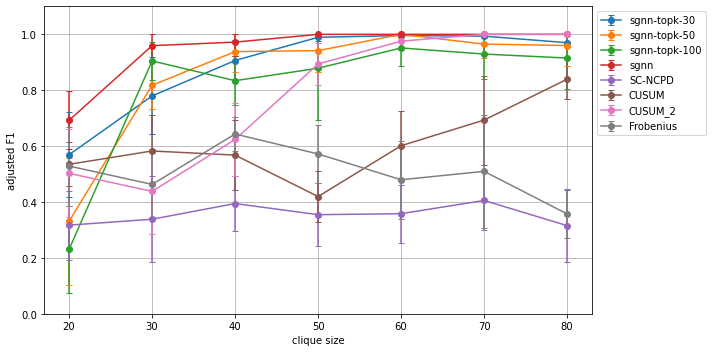

In [90]:
# Plot averaged adjusted f1 scores over R repetitions
#sizes = configs[0]['sizes_clique'][:len(f1_scores)]
sizes = [list_configs[i]['S'] for i in range(len(list_configs))]
list_k = list_configs[0]['top_k']
#, 'WL', 'LAD']
fig, ax = plt.subplots(1, 1, figsize=(10,5))
idx = 0
for key in ['sgnn','ncpd', 'cusum', 'cusum_2', 'frobenius']:#, 'wl', 'lad']:
    if key == 'sgnn':
        for j in range(len(list_f1_scores[0][key][0])):
            f1 = np.array([np.mean(list_f1_scores[i][key][:,j]) for i in range(len(list_f1_scores))])
            std = np.array([np.std(list_f1_scores[i][key][:,j]) for i in range(len(list_f1_scores))])
            print(key, list_k[j], f1)

            ci = 1.96 * std /np.sqrt([len(list_f1_scores[i][key][:,j]) for i in range(len(list_f1_scores))])
            yerr = np.stack([ci * (f1 > ci) + f1 * (f1 <= ci), ci * (f1 + ci < 1.) + (1.- f1) * (f1 + ci >= 1.)], axis=0)
            ax.errorbar(sizes, f1, yerr=yerr, fmt='o-', capsize=3, label=f'sgnn-topk-{list_k[j]}')

        f1 = np.array([np.mean(np.max(list_f1_scores[i][key], axis=1)) for i in range(len(list_f1_scores))])
        std = np.array([np.std(np.max(list_f1_scores[i][key], axis=1)) for i in range(len(list_f1_scores))])
        print(key, list_k[j], f1)

        ci = 1.96 * std /np.sqrt([len(list_f1_scores[i][key][:,0]) for i in range(len(list_f1_scores))])
        yerr = np.stack([ci * (f1 > ci) + f1 * (f1 <= ci), ci * (f1 + ci < 1.) + (1.- f1) * (f1 + ci >= 1.)], axis=0)
        ax.errorbar(sizes, f1, yerr=yerr, fmt='o-', capsize=3, label=f'sgnn')
    #ax.plot(sizes, f1, label=key, )
    else:
        f1 = np.array([np.mean(list_f1_scores[i][key]) for i in range(len(list_f1_scores))])
        std = np.array([np.std(list_f1_scores[i][key]) for i in range(len(list_f1_scores))])
        ci = 1.96 * std /np.sqrt([len(list_f1_scores[i][key]) for i in range(len(list_f1_scores))])
        yerr = np.stack([ci * (f1 > ci) + f1 * (f1 <= ci), ci * (f1 + ci < 1.) + (1.- f1) * (f1 + ci >= 1.)], axis=0)
        ax.errorbar(sizes, f1, yerr=yerr, fmt='o-', capsize=3, label=methods[idx])
        print(key, f1)

    f1_perf[key] = f1
    idx+=1
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(visible=True)
ax.set_xlabel(rf'clique size')
ax.set_ylabel(rf'adjusted F1')
ax.set_ylim(0,1.1)
plt.tight_layout()
plt.savefig(f"/data/kenlay/DyNNet/results/figures/multiple_synth_cps_f1.pdf", bbox_inches = 'tight')
plt.show()

sgnn 30 [0.51215299 0.67488354 0.86619386 0.92953759 0.96343521 0.95538932
 0.96943954]
sgnn 50 [0.4096148  0.75288322 0.9002994  0.91034541 0.99728072 0.960158
 0.93647335]
sgnn 100 [0.39763683 0.81685641 0.74588707 0.85451241 0.93812919 0.90943861
 0.90466434]
sgnn 100 [0.62220605 0.90506856 0.96284242 0.99945913 1.         1.
 1.        ]
ncpd [0.27069049 0.38979863 0.33266233 0.34354217 0.40637445 0.38942604
 0.38061199]
cusum [0.43957803 0.50367686 0.48297944 0.32400613 0.50288586 0.63080736
 0.74052731]
cusum_2 [0.37598108 0.39360444 0.52947203 0.80238281 0.93399335 0.98158954
 0.99115258]
frobenius [0.36839588 0.35786715 0.35366671 0.44739018 0.36039735 0.36509369
 0.32642256]


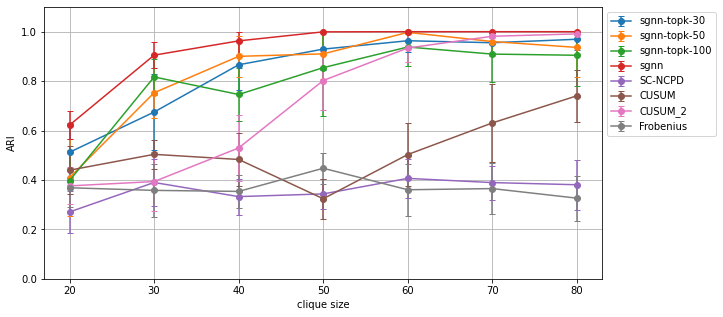

In [91]:
# Plot averaged ARI scores over R repetitions
#sizes = configs[0]['sizes_clique'][:len(f1_scores)]
sizes = [list_configs[i]['S'] for i in range(len(list_configs))]
list_k = list_configs[0]['top_k']
methods = ['s-GNN', 'SC-NCPD',  'CUSUM', 'CUSUM_2', 'Frobenius']#, 'WL', 'LAD']
fig, ax = plt.subplots(1, 1, figsize=(10,5))
idx = 0

for key in ['sgnn','ncpd', 'cusum', 'cusum_2', 'frobenius']:#, 'wl', 'lad']:
    if key == 'sgnn':
        for j in range(len(list_ari[0][key][0])):
            f1 = np.array([np.mean(list_ari[i][key][:,j]) for i in range(len(list_ari))])
            std = np.array([np.std(list_ari[i][key][:,j]) for i in range(len(list_ari))])
            print(key, list_k[j], f1)

            ci = 1.96 * std /np.sqrt([len(list_ari[i][key][:,j]) for i in range(len(list_ari))])
            yerr = np.stack([ci * (f1 > ci) + f1 * (f1 <= ci), ci * (f1 + ci < 1.) + (1.- f1) * (f1 + ci >= 1.)], axis=0)
            ax.errorbar(sizes, f1, yerr=yerr, fmt='o-', capsize=3, label=f'sgnn-topk-{list_k[j]}')

        f1 = np.array([np.mean(np.max(list_ari[i][key], axis=1)) for i in range(len(list_ari))])
        std = np.array([np.std(np.max(list_ari[i][key], axis=1)) for i in range(len(list_ari))])
        print(key, list_k[j], f1)

        ci = 1.96 * std /np.sqrt([len(list_f1_scores[i][key][:,0]) for i in range(len(list_f1_scores))])
        yerr = np.stack([ci * (f1 > ci) + f1 * (f1 <= ci), ci * (f1 + ci < 1.) + (1.- f1) * (f1 + ci >= 1.)], axis=0)
        ax.errorbar(sizes, f1, yerr=yerr, fmt='o-', capsize=3, label=f'sgnn')
    #ax.plot(sizes, f1, label=key, )
    else:
        f1 = np.array([np.mean(list_ari[i][key]) for i in range(len(list_ari))])
        std = np.array([np.std(list_ari[i][key]) for i in range(len(list_ari))])
        ci = 1.96 * std /np.sqrt([len(list_ari[i][key]) for i in range(len(list_ari))])
        yerr = np.stack([ci * (f1 > ci) + f1 * (f1 <= ci), ci * (f1 + ci < 1.) + (1.- f1) * (f1 + ci >= 1.)], axis=0)
        ax.errorbar(sizes, f1, yerr=yerr, fmt='o-', capsize=3, label=methods[idx])
        print(key, f1)
    idx+=1
    ari_perf[key] = f1
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(visible=True)
ax.set_xlabel(rf'clique size')
ax.set_ylabel(rf'ARI')
ax.set_ylim(0,1.1)
#plt.show()
plt.savefig(f"/data/kenlay/DyNNet/results/figures/multiple_synth_cps_ari.pdf", bbox_inches = 'tight')

In [92]:
# Average computational times for each method
methods = ['s-GNN', 'SC-NCPD', 'CUSUM', 'CUSUM_2', 'Frobenius', 'LAD', 'WL']
df_time = pd.DataFrame(columns = ['Method', 'Time (s)'],index=range(len(methods)))
idx = 0
for key in ['train_sgnn', 'ncpd', 'cusum', 'cusum_2', 'frobenius', 'lad', 'wl']:
    t = np.mean(np.concatenate([np.array(list_c_times[i][key]) for i in range(len(list_c_times))], axis=0))
    if key == 'train_sgnn':
        ttest = np.mean(np.concatenate([np.array(list_c_times[i]['test_sgnn']) for i in range(len(list_c_times))], axis=0))
        df_time.iloc[0] = ['s-GNN',f'{round(t,1)} + {round(ttest,2)}']
    else:
        df_time.iloc[idx] = [methods[idx],format(t,".1f")]
    idx+=1
print(df_time)

      Method        Time (s)
0      s-GNN  5080.1 + 15.46
1    SC-NCPD           496.7
2      CUSUM           127.3
3    CUSUM_2           843.4
4  Frobenius            21.7
5        LAD           119.6
6         WL          2372.3


In [94]:
# Average perf for each method
methods = ['sgnn', 'cusum_2', 'cusum' ,'ncpd',   'frobenius']#, 'LAD', 'WL']
df_perf = pd.DataFrame(columns=["size", 'sgnn', 'cusum_2', 'cusum' ,'ncpd',   'frobenius'], index=range(len(list_configs)))
idx = 0
for j in range(len(list_configs)):
    df_perf.iloc[idx] = [sizes[j]] + [format(f1_perf[key][j], ".2f") for key in methods]
    idx+=1
print(df_perf.to_latex())

\begin{tabular}{lllllll}
\toprule
{} & size &  sgnn & cusum\_2 & cusum &  ncpd & frobenius \\
\midrule
0 &   20 &  0.69 &    0.50 &  0.53 &  0.32 &      0.53 \\
1 &   30 &  0.96 &    0.44 &  0.58 &  0.34 &      0.46 \\
2 &   40 &  0.97 &    0.62 &  0.57 &  0.39 &      0.64 \\
3 &   50 &  1.00 &    0.89 &  0.42 &  0.35 &      0.57 \\
4 &   60 &  1.00 &    0.98 &  0.60 &  0.36 &      0.48 \\
5 &   70 &  1.00 &    1.00 &  0.69 &  0.41 &      0.51 \\
6 &   80 &  1.00 &    1.00 &  0.84 &  0.32 &      0.36 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_37400/1294318976.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_perf.to_latex())
